## 7-3. Kernal density estimation

히스토그램은 관측값을 구간화하여 확률 밀도 함수를 근사하는 것을 목표로 한다. 커널 밀도 추정 (Kernal Density Estimation, KDE)는 이에 대한 해결책을 제시한다. 

In [1]:
import seaborn as sns

In [10]:
penguins = sns.load_dataset("penguins")
tips = sns.load_dataset("tips")

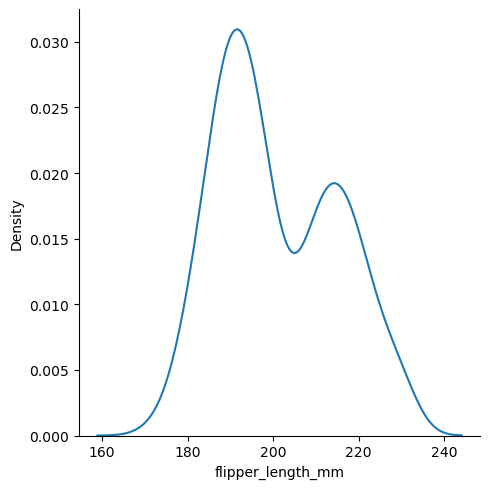

In [3]:
sns.displot(penguins, x="flipper_length_mm", kind="kde")

### Choosing the smoothing bandwidth

KDE의 능력은 smoothing bandwidth에 따라 달라진다. 

Over-smoothed estimate는 의미있는 특징을 놓칠 수 있지만 무작위 노이즈 내에서 데이터의 실제 모양을 모호하게 한다.

추정치의 견고성을 확인하는 가장 쉬운 방법은 기본 대역폭을 조정하는 것이다. 

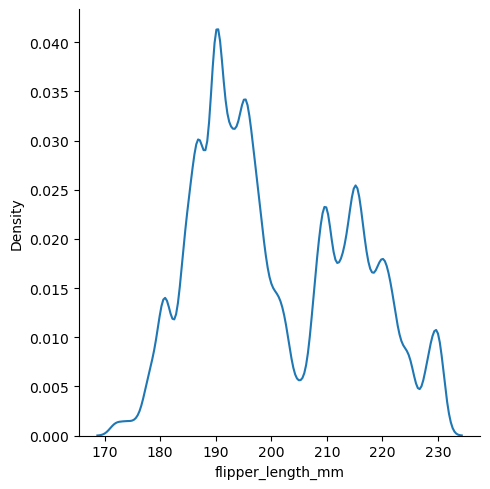

In [4]:
sns.displot(penguins, x="flipper_length_mm", kind="kde", bw_adjust=.25)

Bandwidth가 좁으면 bimodality가 훨씬 뚜렷하다. 반대로 대역폭이 크면 bimodality가 거의 모호해진다. 

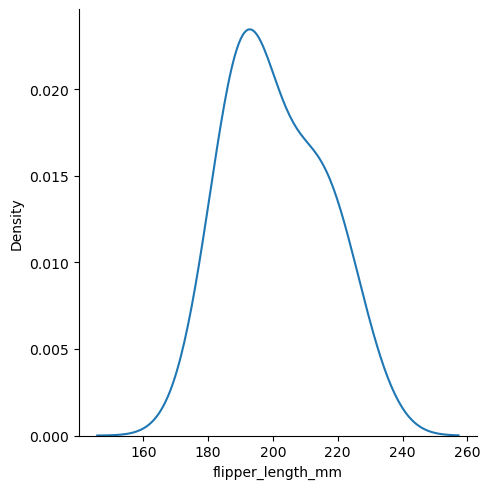

In [6]:
sns.displot(penguins, x="flipper_length_mm", kind="kde", bw_adjust=2)

### Conditioning on other variables

히스토그램에서와 마찬가지로, 'hue' 파라미터를 지정하면 해당 변수의 각 레벨에 대해 별도의 밀도 추정치가 계산된다. 

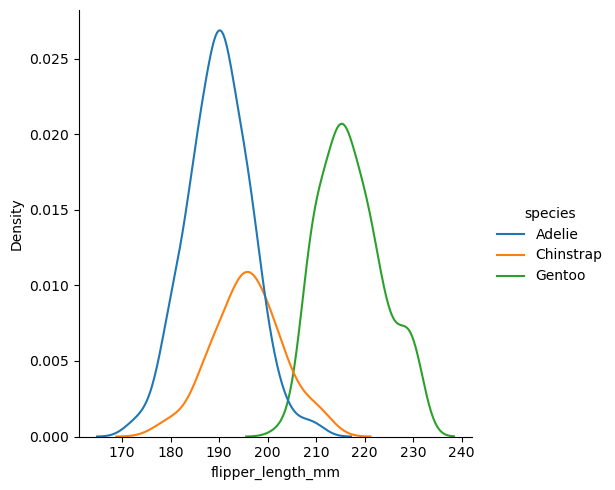

In [7]:
sns.displot(penguins, x="flipper_length_mm", hue="species", kind="kde")

많은 경우에, layered KDE는 layered histogram 보다 해석하기가 쉽다. 그래서 다양한 비교를 행할 때 자주 사용된다. 많은 비슷한 옵션들이 다수의 분포를 확인하는 데에 적용된다. 

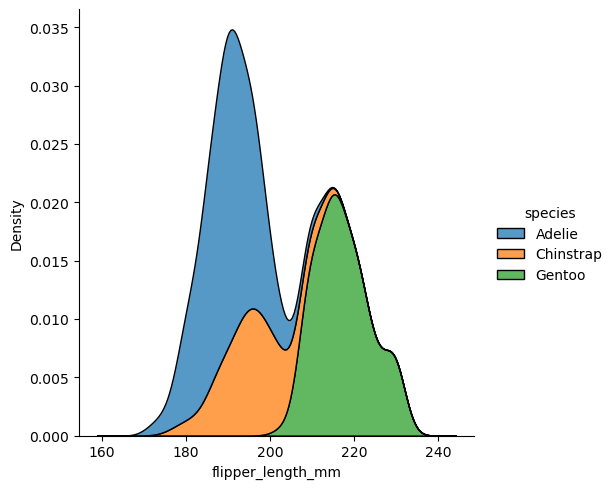

In [8]:
sns.displot(penguins, x="flipper_length_mm", hue="species", kind="kde", multiple="stack")

### Kernal density estimation pitfalls

KDE plot은 많은 장점을 갖고 있다. 데이터의 중요한 특징을 쉽게 파악할 수 있고, 하위 집합 간 비교가 용이하다.


 하지만 KDE가 기초 데이터를 제대로 표현하지 못하는 경우도 있다. 이는 KDE의 논리가 기본 분포가 매끄럽고 경계가 없다고 가정하기 때문이다. 이 가정이 실패할 수 있는 경우는, 변수가 자연적으로 경계가 있는 양을 반영하는 경우이다. 

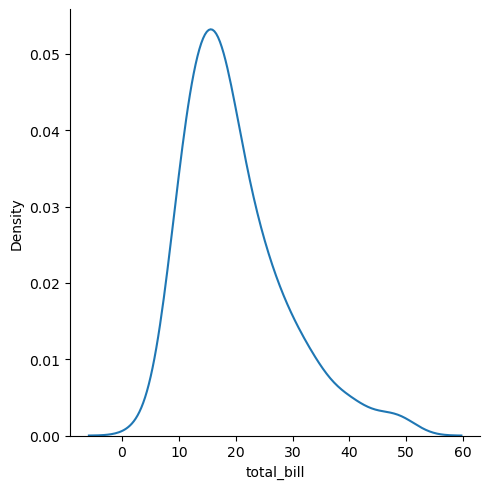

In [11]:
sns.displot(tips, x="total_bill", kind="kde")

'cut' 파라미터를 활용하면 이러한 문제를 부분적으로 피할 수 있다. 그러나 이는 커브를 그리는 위치에만 영향을 미치며, 데이터가 존재할 수 없는 범위에서는 밀도 추정치가 여전히 평활화되어 분포의 극단에서 인위적으로 낮아진다. 

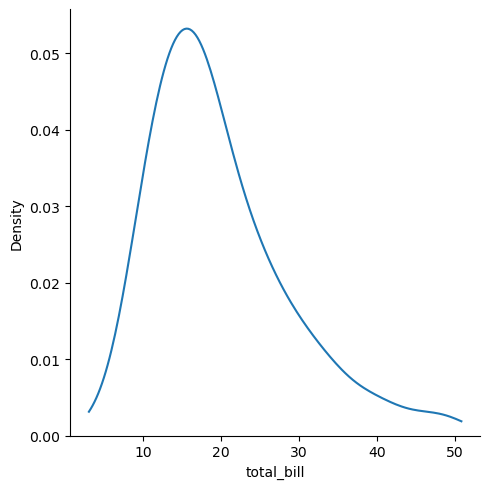

In [12]:
sns.displot(tips, x="total_bill", kind="kde", cut=0)

불연속형 데이터나, 이상치를 가진 연속형 데이터의 경우에도 KDE 방식은 적절하지 않다. 데이터가 매끄럽지 않은 경우에도 KDE는 항상 매끄러운 곡선을 표시한다는 것을 기억해야한다. 

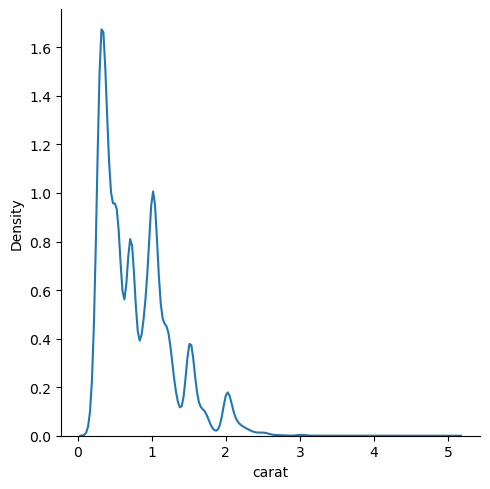

In [13]:
diamonds = sns.load_dataset("diamonds")
sns.displot(diamonds, x="carat", kind="kde")

히스토그램을 통해 실제 데이터에서는 특정 값을 기준으로 peak가 있다는 것을 알 수 있다. 

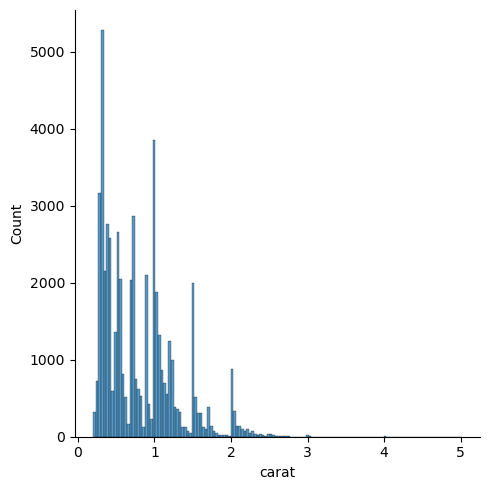

In [14]:
sns.displot(diamonds, x="carat")

절충안으로 이 두 가지 접근 방식을 결합할 수 있다. displot() 에서 kDE 곡선을 표현할 수 있는 옵션이 있다: kde=True

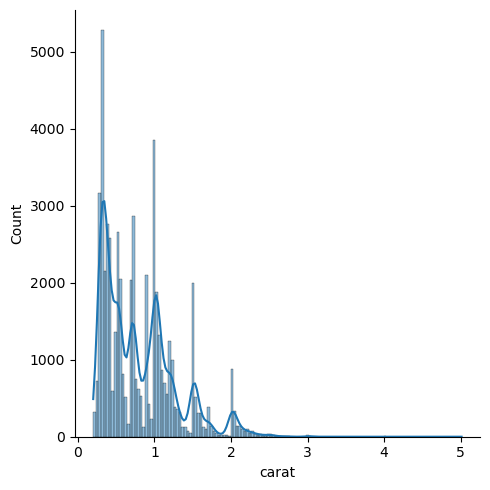

In [16]:
sns.displot(diamonds, x="carat", kde=True)